<a href="https://colab.research.google.com/github/nidhi7330/nidhi7330/blob/main/Tour_Content_based_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
#reding the dataset
tour_desc = pd.read_csv('/content/tour.csv')#,encoding = 'unicode_escape')


In [3]:
#Give the number of rows and columns
tour_desc.shape

(130, 10)

In [4]:
#To get the overview of the dataset
tour_desc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Count       130 non-null    int64  
 1   Title       130 non-null    object 
 2   Vote_count  130 non-null    int64  
 3   Rating      130 non-null    float64
 4   Category    130 non-null    object 
 5   Days        130 non-null    object 
 6   Location    130 non-null    object 
 7   Keywords    129 non-null    object 
 8   Country     129 non-null    object 
 9   Price       130 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 10.3+ KB


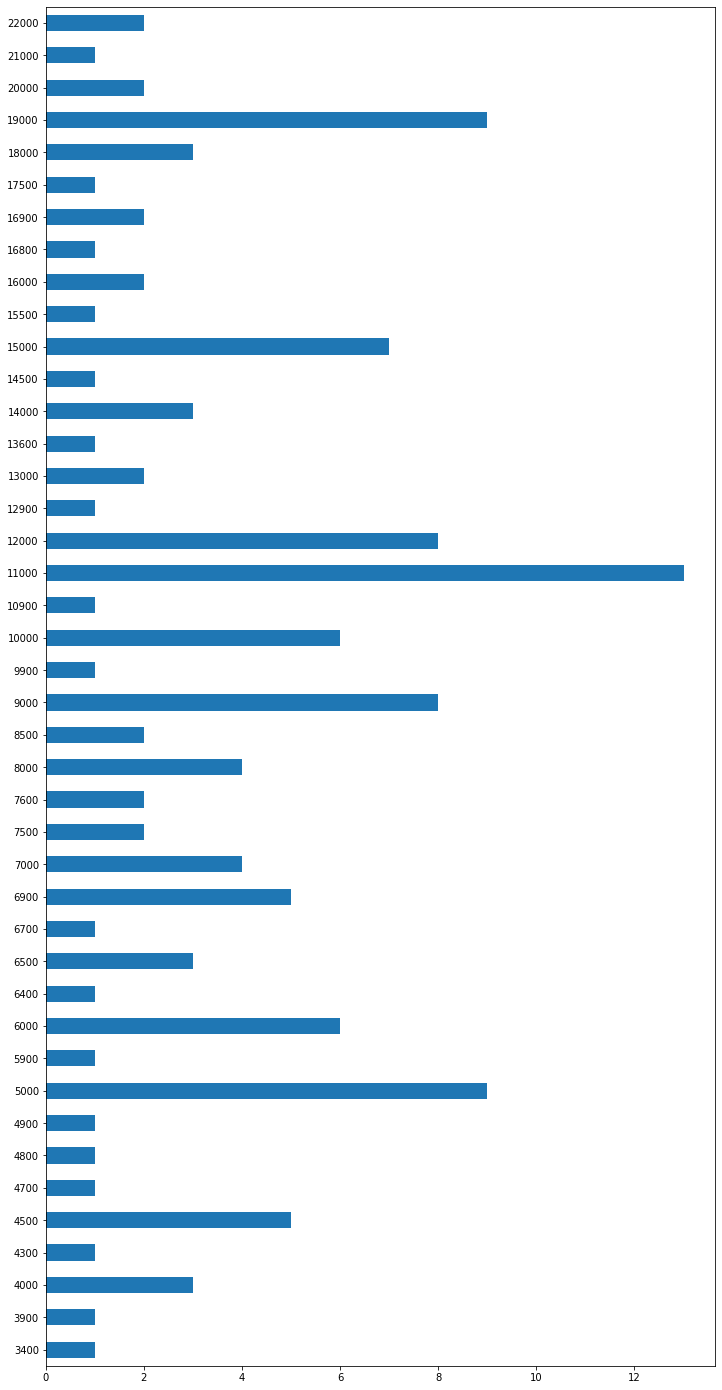

In [5]:
#Generating graph on the basis of Price distribution
tour_desc['Price'].value_counts(dropna=False).sort_index().plot(kind= 'barh', figsize = (12, 25))


In [6]:
#Calculating the mean of Rating
C = tour_desc['Rating'].mean()

In [7]:
#Calculating Quantile range on the basis of Vote_count
m =  tour_desc['Vote_count'].quantile(0.10)

In [8]:
## Filtering all the tour that have vote_count more than 'm'
quali =  tour_desc.copy().loc[ tour_desc['Vote_count'] >= m]
quali.shape

(117, 10)

In [9]:
# Calculating the weighted rating of each tour package
def weighted_rate(v, R, m=m, C=C):
  ans = (v/(v+m) * R)+(m/(v+m) * C)
  return ans


In [10]:
quali['Score'] = quali.apply(lambda row : weighted_rate(row['Vote_count'], row['Rating']), axis = 1)


In [11]:
quali = quali.sort_values('Score', ascending=False)


In [12]:
(quali
 .query('Location == "Uttarpradesh"')
 .sort_values('Score', ascending=False).head(10))

,Count,Title,Vote_count,Rating,Category,Days,Location,Keywords,Country,Price,Score
104,34614,Masrur,412,9.9,Heritage,5N 6D,Uttarpradesh,early 8th-century complex of rock-cut Hindu te...,India,8000,9.673286
80,213295,SahetSravasti,890,9.7,Pilgrimage,5N 6D,Uttarpradesh,Located near the West Rapti River,India,5000,9.598583
100,63206,Old Fort (Shahi fort) Jaunpur,890,9.6,Heritage,8N 9D,Uttarpradesh,fort built during the 14th century in Jaunpur,NaN,16000,9.503100
97,56333,Excavated Site Vikramshila Antichak,789,9.5,Heritage,5N 6D,Uttarpradesh,most important centres of learning in India,India,7000,9.396389
102,22309,Observatory Man Singh,123,9.9,Pilgrimage,4N 5D,Uttarpradesh,famous as a masonry observatory,India,6500,9.276434
1,1799953,Agra Fort,158,9.6,Fort,3N 4D,Uttarpradesh,historical fort in Agra,India,10000,9.148622
79,227668,Jhansi Fort,245,9.3,Fort,9N 10D,Uttarpradesh,Jhansi ka Kila is a fortress,India,22000,9.029395
78,280809,Residency Lucknow,567,8.8,Pilgrimage,8N 9D,Uttarpradesh,also called as the British Residency,India,19000,8.707009
107,5266,Group of Temples,134,9.1,Heritage,7N 8D,Uttarpradesh,reserved for religious or spiritual rituals,India,14000,8.706640
96,185316,Remains of Patliputra Kumrahar,678,7.9,Wildlife,9N 10D,Uttarpradesh,ancient city of Pataliputra,India,20000,7.873961


In [13]:
conbas_df = quali[['Title','Category','Days','Location','Keywords']]


In [14]:
#converting the names and keyword instances into lowercase and strip all the spaces between them #comparing the code with keywords
conbas_df['Category'] = conbas_df['Category'].str.replace(' ','').str.lower().str.replace('-','')
conbas_df['Location'] = conbas_df['Location'].str.replace(' ','').str.lower().str.replace('-','')
conbas_df['Days'] = conbas_df['Days'].str.replace(' ','').str.lower().str.replace('-','')
#conbas_df['Price'] = conbas_df['Price'].str.replace(' ','').str.lower().str.replace('-','')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [15]:
 conbas_df['Keywords'] = conbas_df['Keywords'].replace(np.nan, 'Not Available')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
conbas_df['soup'] = conbas_df['Keywords'] + ' ' + conbas_df['Category'] + ' ' + conbas_df['Days'] + ' ' + conbas_df['Location'] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
conbas_df.columns


Index(['Title', 'Category', 'Days', 'Location', 'Keywords', 'soup'], dtype='object')

In [18]:
conbas_df = conbas_df.drop(columns=['Category','Days','Location','Keywords'])


In [19]:
conbas_df.head()


,Title,soup
5,Krabi,"province characterized by craggy, sheer limest..."
3,Botanic Gardens,"features beautiful lakes, animals, flowers and..."
71,Deeg Palaces Deeg,built in 1772 as a luxurious summer resort pil...
104,Masrur,early 8th-century complex of rock-cut Hindu te...
26,Sun Temple Konark,"accompanied by wooden structures heritage,pilg..."


In [20]:
conbas_df.shape


(117, 2)

In [21]:
conbas_df.head()

,Title,soup
5,Krabi,"province characterized by craggy, sheer limest..."
3,Botanic Gardens,"features beautiful lakes, animals, flowers and..."
71,Deeg Palaces Deeg,built in 1772 as a luxurious summer resort pil...
104,Masrur,early 8th-century complex of rock-cut Hindu te...
26,Sun Temple Konark,"accompanied by wooden structures heritage,pilg..."


In [22]:
q = pd.merge(quali,conbas_df, left_on=['Title'], right_on=['Title'], how='left')


In [23]:
conbas_df.head()

,Title,soup
5,Krabi,"province characterized by craggy, sheer limest..."
3,Botanic Gardens,"features beautiful lakes, animals, flowers and..."
71,Deeg Palaces Deeg,built in 1772 as a luxurious summer resort pil...
104,Masrur,early 8th-century complex of rock-cut Hindu te...
26,Sun Temple Konark,"accompanied by wooden structures heritage,pilg..."


In [24]:
q[q['Category'].str.contains('Heritage')]

,Count,Title,Vote_count,Rating,Category,Days,Location,Keywords,Country,Price,Score,soup
0,215845,Krabi,890,9.9,Heritage,5N 6D,southern Thailand,"province characterized by craggy, sheer limest...",Thailand,10000,9.789550,"province characterized by craggy, sheer limest..."
3,34614,Masrur,412,9.9,Heritage,5N 6D,Uttarpradesh,early 8th-century complex of rock-cut Hindu te...,India,8000,9.673286,early 8th-century complex of rock-cut Hindu te...
4,2300665,Sun Temple Konark,654,9.8,"Heritage, Pilgrimage",7N 8D,Odisha,accompanied by wooden structures,India,16900,9.658152,"accompanied by wooden structures heritage,pilg..."
5,68877,Guntupalli,348,9.9,Heritage,4N 5D,AndraPradesh,census town in Krishna district,India,4500,9.636092,census town in Krishna district heritage 4n5d...
7,1551835,Charminar,908,9.7,Heritage,7N 8D,Hyderabad,landmark has become known as a symbol of Hyder...,India,14000,9.600504,landmark has become known as a symbol of Hyder...
10,238581,Aga Khan Palace Pune,348,9.8,Heritage,3N 4D,Maharashtra,built by Sultan Muhammed Shah Aga Khan III,India,4300,9.546884,built by Sultan Muhammed Shah Aga Khan III her...
11,63206,Old Fort (Shahi fort) Jaunpur,890,9.6,Heritage,8N 9D,Uttarpradesh,fort built during the 14th century in Jaunpur,NaN,16000,9.503100,fort built during the 14th century in Jaunpur ...
12,431521,"Caves, Badami",345,9.7,Heritage,7N 8D,Karnataka,situated on the west bank of a man-made lake,India,11000,9.455798,situated on the west bank of a man-made lake h...
13,56333,Excavated Site Vikramshila Antichak,789,9.5,Heritage,5N 6D,Uttarpradesh,most important centres of learning in India,India,7000,9.396389,most important centres of learning in India he...
16,24298,Fort on Rock Dindigul,789,9.4,Heritage,6N 7D,Tamilnadu,built in 16th-century by Madurai Nayakar Dynasty,India,7000,9.301455,built in 16th-century by Madurai Nayakar Dynas...


In [25]:
q.shape


(117, 12)

In [26]:
q[q.duplicated(['Title'])]

,Count,Title,Vote_count,Rating,Category,Days,Location,Keywords,Country,Price,Score,soup


In [27]:
q.to_csv('/content/travel.csv')


In [28]:
q.head()

,Count,Title,Vote_count,Rating,Category,Days,Location,Keywords,Country,Price,Score,soup
0,215845,Krabi,890,9.9,Heritage,5N 6D,southern Thailand,"province characterized by craggy, sheer limest...",Thailand,10000,9.789550,"province characterized by craggy, sheer limest..."
1,427854,Botanic Gardens,783,9.9,Park,7N 8D,Cluny Road,"features beautiful lakes, animals, flowers and...",Singapore,20000,9.775226,"features beautiful lakes, animals, flowers and..."
2,34699,Deeg Palaces Deeg,654,9.9,Pilgrimage,3N 4D,AndraPradesh,built in 1772 as a luxurious summer resort,India,4500,9.752104,built in 1772 as a luxurious summer resort pil...
3,34614,Masrur,412,9.9,Heritage,5N 6D,Uttarpradesh,early 8th-century complex of rock-cut Hindu te...,India,8000,9.673286,early 8th-century complex of rock-cut Hindu te...
4,2300665,Sun Temple Konark,654,9.8,"Heritage, Pilgrimage",7N 8D,Odisha,accompanied by wooden structures,India,16900,9.658152,"accompanied by wooden structures heritage,pilg..."


In [29]:
q['soup'].head()


0    province characterized by craggy, sheer limest...
1    features beautiful lakes, animals, flowers and...
2    built in 1772 as a luxurious summer resort pil...
3    early 8th-century complex of rock-cut Hindu te...
4    accompanied by wooden structures heritage,pilg...
Name: soup, dtype: object

In [30]:
# removing the stop words
from sklearn.feature_extraction.text import CountVectorizer
tour_tfidf = CountVectorizer(stop_words='english')
# computing TF-IDF matrix required for calculating cosine similarity
tour_matrix = tour_tfidf.fit_transform(tour_desc['Keywords'].values.astype('U'))

In [31]:
tour_matrix.shape


(130, 379)

In [32]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tour_matrix, tour_matrix)

In [33]:
# Reset index of your main DataFrame and construct reverse mapping as before
q = q.reset_index()
indices = pd.Series(q.index, index=q['Title'])
#indices1 = pd.Series(q.index, index=q['Rating'])
#indices = pd.Series(q.index, index=q['Price'])



In [34]:
def get_recommendations(Title, cosine_sim = cosine_sim):
    idx = indices[Title]  # Get the index of the movie that matches the title
    sim_scores = list(enumerate(cosine_sim[idx]))   # Get the pairwsie similarity scores of all movies with that movie
    #print(sim_scores)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)  # Sort the movies based on the similarity scores
    #print(sim_scores)
    sim_scores = sim_scores[1:11]  # Get the scores of the 15 most similar movies
    #print(sim_scores)
    Tour_indices = [i[0] for i in sim_scores]  # Get the movie indices
    Tour = q.loc[Tour_indices][['Title', 'Rating','Price']]

    return tour_desc['Title'].loc[Tour_indices]

In [35]:
get_recommendations('Charminar') #this gives recommendation on similar kewords


74               Hazardwari Palace
81                      Rani Mahal
19                  Royal Palaces 
0                        Taj Mahal
1                        Agra Fort
2          Tomb of Akbar the Great
3                  Botanic Gardens
4     Sungei Buloh Wetland Reserve
5                            Krabi
6                        Kathmandu
Name: Title, dtype: object